In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('../output/R18_AGE.csv')
df_FC = pd.read_csv('../output/R18_FC_AGE.csv')
df_SC = pd.read_csv('../output/R18_SC_AGE.csv')
df_SCD = pd.read_csv('../output/R18_SCD_AGE.csv')

In [77]:
label = 0
label_trsfm = {}

for m in range(3):
    for g in range(2):
        for a in range(3):
            label_trsfm[label] = ':'.join([str(m),str(g),str(a)])
            label += 1
            
# mask 0 1 2
# gender 0 1
# age 0 1 2
true_label = {
    'mask': ['Wear', 'Incorrect', 'Not Wear'],
    'gender': ['male', 'female'],
    'age': ['<30', '>=30 and <60', '>=60']
}

def get_age(idx):
    ori = df.iloc[idx]['ans']
    fc = df_FC.iloc[idx]['ans']
    sc = df_SC.iloc[idx]['ans']
    scd = df_SCD.iloc[idx]['ans']
#     label = label_trsfm[label].split(':')
#     label = list(map(int, label))
#     mask = true_label['mask'][label[0]]
#     gender = true_label['gender'][label[1]]
#     age = true_label['age'][label[2]]
    li = [ori, fc, sc, scd]
    if(li.count(6) >= 1):
        result = 6
    else:
        result = int(sum(li) / 4 + 0.5)
        
    if (result >= 6):
        return 2
    elif (result >= 3):
        return 1
    else:
        return 0

In [78]:
# IMG_DIR = Path('../../input/data/eval/images_resize')
out_path = '/opt/ml/code/output/RES18_AGE_COMBI4_v2.csv'

[]

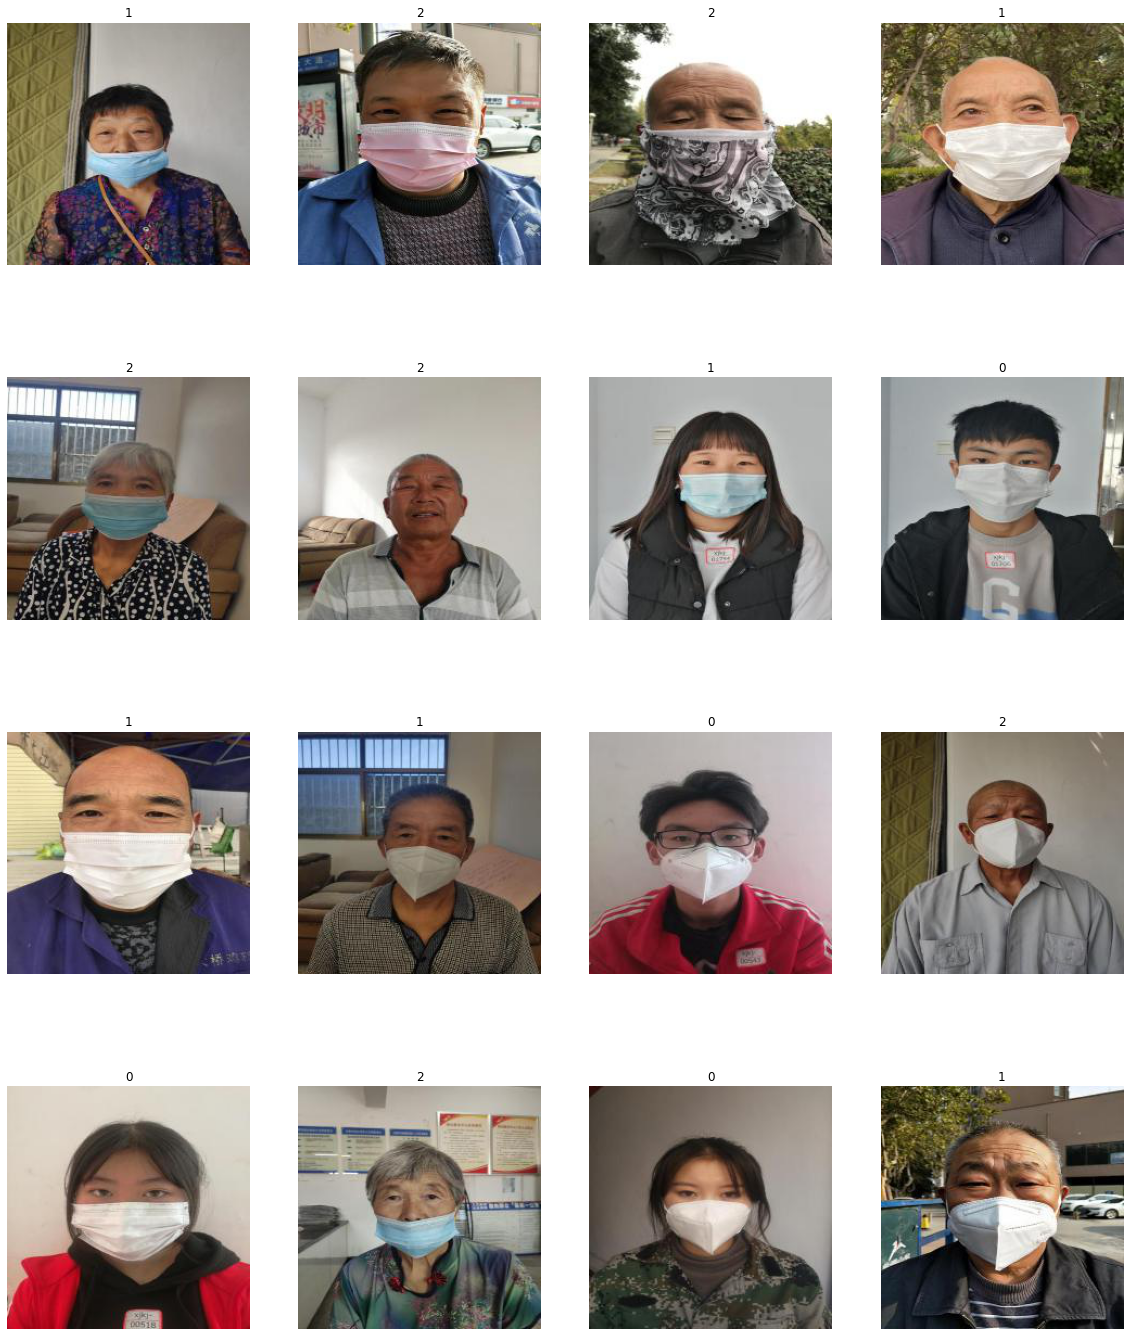

In [81]:
NUM_SHOW = 4
TOTAL = NUM_SHOW * NUM_SHOW

plt.figure(figsize=(20,25))

start_idx = np.random.randint(0,len(df_normal) - TOTAL)
cnt = 1
for idx in range(start_idx, start_idx + TOTAL):
    img = Image.open(IMG_DIR / df.loc[idx, 'ImageID'])
    plt.subplot(NUM_SHOW, NUM_SHOW, cnt)
    plt.imshow(img)
#     plt.title(get_label_verbosity(df.loc[idx, 'ans']))
    plt.title(get_age(idx))
    plt.axis('off')
    cnt += 1
    
plt.plot()

In [80]:
df_out = pd.DataFrame(None, columns = ['ImageID', 'ans'])

In [74]:
for i in range(len(df)):
    img_id = df.iloc[i]['ImageID']
    ans = get_age(i)
    data = {
            'ImageID': img_id,
            'ans': ans
        }
    df_out = df_out.append(data, ignore_index=True)


In [75]:
df_out.to_csv(out_path, index=False)

In [61]:
a = [2, 4, 6, 6]
print(int(sum(a) / len(a)))

4
